# Project 1.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import plotly.express as px 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Study data files
medicare_path = "resources/Medicare_Inpatient_Hospital_by_Provider_and_Service_2021.csv" 

# Read the mouse data and the study results
medicare_data = pd.read_csv(medicare_path)


# Display the data table for preview
medicare_data.head()


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.40000,36794.266670,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.12500,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.90000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.66670,12354.777780,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.95349,8284.186047,6182.697674


In [2]:
medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151989 entries, 0 to 151988
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           151989 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      151989 non-null  object 
 2   Rndrng_Prvdr_City          151989 non-null  object 
 3   Rndrng_Prvdr_St            151989 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    151989 non-null  int64  
 5   Rndrng_Prvdr_Zip5          151989 non-null  int64  
 6   Rndrng_Prvdr_State_Abrvtn  151989 non-null  object 
 7   Rndrng_Prvdr_RUCA          151989 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     151989 non-null  object 
 9   DRG_Cd                     151989 non-null  int64  
 10  DRG_Desc                   151989 non-null  object 
 11  Tot_Dschrgs                151989 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       151989 non-null  float64
 13  Avg_Tot_Pymt_Amt           15

In [4]:
#Check data types (convert dates), decide what to do with null values, change column names 
nice_column_names = {
    'Rndrng_Prvdr_CCN': 'Provider_CCN',
    'Rndrng_Prvdr_Org_Name': 'Provider_Name',
    'Rndrng_Prvdr_City': 'Provider_City',
    'Rndrng_Prvdr_St': 'Provider_State',
    'Rndrng_Prvdr_State_FIPS': 'Provider_State_FIPS',
    'Rndrng_Prvdr_Zip5': 'Provider_Zip',
    'Rndrng_Prvdr_State_Abrvtn': 'Provider_State_Abbreviation',
    'Rndrng_Prvdr_RUCA': 'Provider_RUCA',
    'Rndrng_Prvdr_RUCA_Desc': 'Provider_RUCA_Description',
    'DRG_Cd': 'DRG_Code',
    'DRG_Desc': 'DRG_Description',
    'Tot_Dschrgs': 'Total_Discharges',
    'Avg_Submtd_Cvrd_Chrg': 'Average_Submitted_Covered_Charges',
    'Avg_Tot_Pymt_Amt': 'Average_Total_Payment_Amount',
    'Avg_Mdcr_Pymt_Amt': 'Average_Medicare_Payment_Amount'
}
medicare_data.rename(columns=nice_column_names, inplace=True)
medicare_data.head()

,Provider_CCN,Provider_Name,Provider_City,Provider_State,Provider_State_FIPS,Provider_Zip,Provider_State_Abbreviation,Provider_RUCA,Provider_RUCA_Description,DRG_Code,DRG_Description,Total_Discharges,Average_Submitted_Covered_Charges,Average_Total_Payment_Amount,Average_Medicare_Payment_Amount
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.40000,36794.266670,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.12500,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.90000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.66670,12354.777780,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.95349,8284.186047,6182.697674


In [5]:
medicare_data.describe()


,Provider_CCN,Provider_State_FIPS,Provider_Zip,Provider_RUCA,DRG_Code,Total_Discharges,Average_Submitted_Covered_Charges,Average_Total_Payment_Amount,Average_Medicare_Payment_Amount
count,151989.000000,151989.000000,151989.000000,151989.000000,151989.000000,151989.000000,1.519890e+05,151989.000000,151989.000000
mean,255627.918751,27.955082,47407.442710,1.798583,421.301588,34.560909,8.311592e+04,18182.927578,15282.824775
std,151927.769369,15.411830,28415.829241,6.431545,253.106873,51.031237,1.051981e+05,20446.575550,17964.769050
min,10001.000000,1.000000,1040.000000,1.000000,1.000000,11.000000,3.340845e+03,2383.923077,132.923077
25%,110036.000000,13.000000,24014.000000,1.000000,228.000000,14.000000,3.208451e+04,8217.538462,6500.611111
50%,240207.000000,27.000000,44053.000000,1.000000,377.000000,20.000000,5.333833e+04,12327.039060,10196.000000
75%,380018.000000,41.000000,73070.000000,1.000000,639.000000,35.000000,9.466100e+04,20001.594600,16732.233330
max,670309.000000,56.000000,99801.000000,99.000000,988.000000,2650.000000,3.697459e+06,632473.076900,610619.909100


In [7]:
medicare_data["DRG_Description"].value_counts().head(20)


DRG_Description
RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC                                        2830
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                                2718
HEART FAILURE AND SHOCK WITH MCC                                                         2653
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC                             2309
SIMPLE PNEUMONIA AND PLEURISY WITH MCC                                                   2205
KIDNEY AND URINARY TRACT INFECTIONS WITHOUT MCC                                          2078
RENAL FAILURE WITH CC                                                                    2047
PULMONARY EDEMA AND RESPIRATORY FAILURE                                                  2040
GASTROINTESTINAL HEMORRHAGE WITH CC                                                      2018
ESOPHAGITIS, GASTROENTERITIS AND MISCELLANEOUS DIGESTIVE DISORDERS WITHOUT MCC           2014
RENAL FAILURE WITH MCC                      

In [8]:
# Checking the number of conditions; there are 538 DRG codes versus 524 DRG descriptions 
drg_count = medicare_data["DRG_Description"].nunique()
drg_count

524

In [ ]:
#Create cost summary tables/bar charts as was done for septicemia with and without MCC 
#RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC 
#HEART FAILURE AND SHOCK WITH MCC
#SIMPLE PNEUMONIA AND PLEURISY WITH MCC


In [9]:
#Complication and co-morbidity (CC) or major CC (MCC)
# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC

sep_mcc = medicare_data.loc[medicare_data["DRG_Description"]=="SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC"]

#Cost summary
mean_subm_chrg_sep_mcc = sep_mcc.groupby("Provider_State_Abbreviation")["Average_Submitted_Covered_Charges"].mean().sort_values(ascending=False)
mean_tot_paymt_sep_mcc = sep_mcc.groupby("Provider_State_Abbreviation")["Average_Total_Payment_Amount"].mean().sort_values(ascending=False)
mean_med_paymt_sep_mcc = sep_mcc.groupby("Provider_State_Abbreviation")["Average_Medicare_Payment_Amount"].mean().sort_values(ascending=False)
average_cov = (mean_med_paymt_sep_mcc/mean_subm_chrg_sep_mcc)*100
# med_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary_sep_mcc = pd.DataFrame({
"Mean Submitted Covered Charge": mean_subm_chrg_sep_mcc,
"Average Total Payment Amount": mean_tot_paymt_sep_mcc,
"Average Medicare Payment Amount": mean_med_paymt_sep_mcc,
"Average Coverage (%)" : average_cov

})
cost_summary_sep_mcc


,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount,Average Coverage (%)
Provider_State_Abbreviation,,,,
AK,84611.451284,27184.162910,25228.572857,29.816972
AL,65082.085331,13619.981751,11467.334724,17.619802
AR,46657.009815,12906.422388,11400.033975,24.433700
AZ,83729.376898,15987.220234,13918.213643,16.622856
CA,114488.611691,21627.097657,18551.898044,16.204143
CO,83538.145801,16775.801685,14354.140980,17.182738
CT,53104.028492,18524.823135,16317.390069,30.727217
DC,97006.030062,22664.944952,17417.004482,17.954559
DE,55242.067692,18177.481047,15998.810707,28.961281


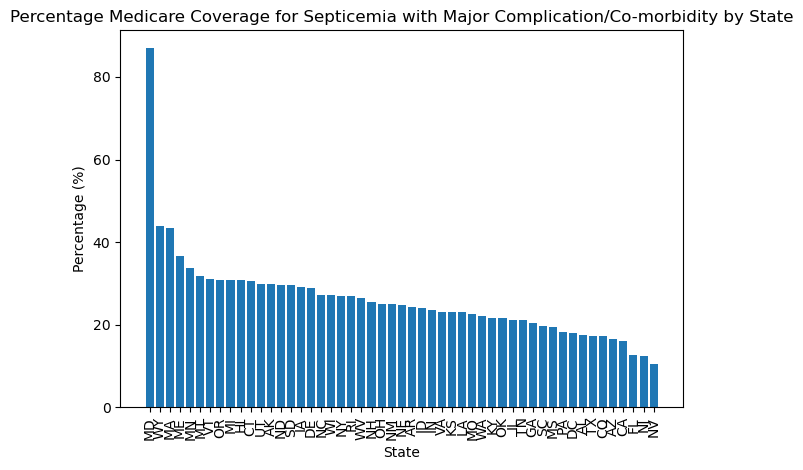

In [10]:
# Create a bar chart of % coverage by state 
height = average_cov.sort_values(ascending=False)

plt.bar(x=height.index, height=height)
plt.title("Percentage Medicare Coverage for Septicemia with Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig("Chart4.png")
plt.show()

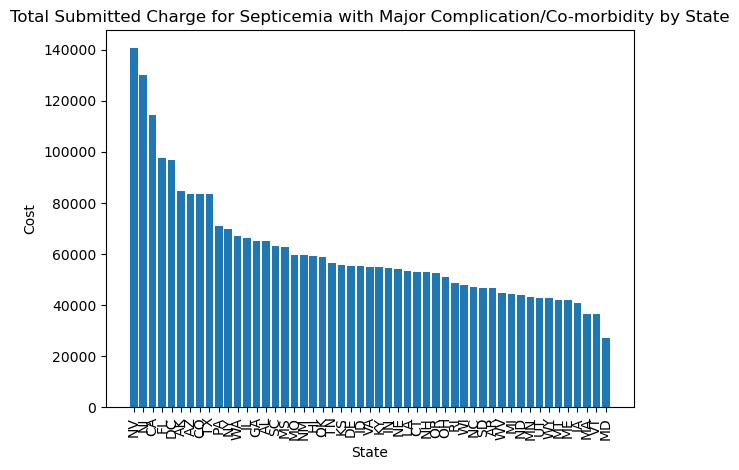

In [11]:
# Create a bar chart of total payments by state 
height = cost_summary_sep_mcc["Mean Submitted Covered Charge"].sort_values(ascending=False)

plt.bar(x=height.index, height=height)
plt.title("Total Submitted Charge for Septicemia with Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig("Chart3.png")
plt.show()

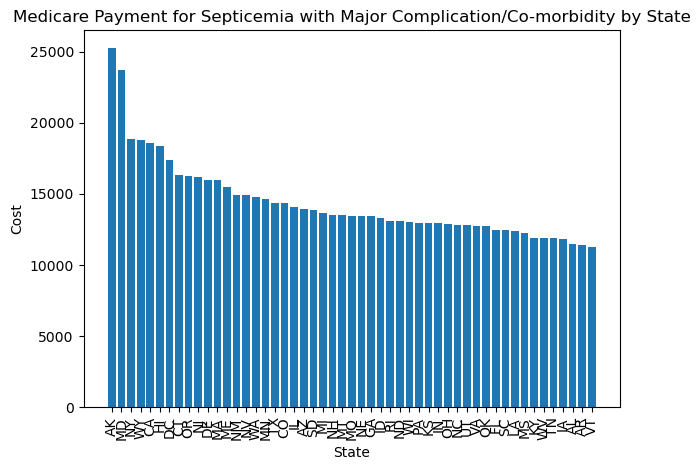

In [12]:
# Create a bar chart of medicare payments by state 
height = cost_summary_sep_mcc["Average Medicare Payment Amount"].sort_values(ascending=False)

plt.bar(x=height.index, height=height)
plt.title("Medicare Payment for Septicemia with Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig("Chart.png")
plt.show()

In [13]:




# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC
sep = medicare_data.loc[medicare_data["DRG_Description"]=="SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC"]

#Cost summary
mean_subm_chrg_sep = sep.groupby("Provider_State_Abbreviation")["Average_Submitted_Covered_Charges"].mean().sort_values(ascending=False)
mean_tot_paymt_sep = sep.groupby("Provider_State_Abbreviation")["Average_Total_Payment_Amount"].mean().sort_values(ascending=False)
mean_med_paymt_sep = sep.groupby("Provider_State_Abbreviation")["Average_Medicare_Payment_Amount"].mean().sort_values(ascending=False)
# med_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary_sep = pd.DataFrame({
"Mean Submitted Covered Charge": mean_subm_chrg_sep,
"Average Total Payment Amount": mean_tot_paymt_sep,
"Average Medicare Payment Amount": mean_med_paymt_sep

})
cost_summary_sep

,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount
Provider_State_Abbreviation,,,
AK,57205.032628,13220.329022,11556.842367
AL,39761.379826,7754.657359,5755.933901
AR,26079.544720,6961.548592,5618.826287
AZ,45686.292307,8478.176307,6695.179165
CA,64239.051959,11384.972145,8896.876512
CO,49640.401837,8738.209222,6706.375726
CT,31136.077864,10096.485538,7762.660993
DC,49235.648604,11586.027624,7786.628341
DE,32209.798697,9022.817980,6771.355042


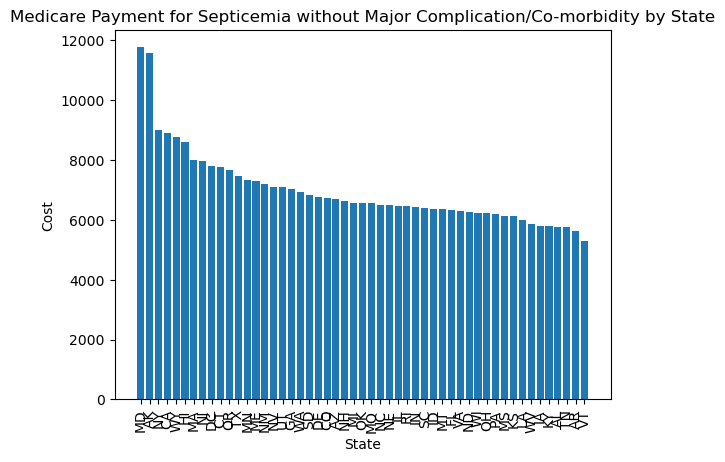

In [14]:
# Create a bar chart of medicare payments by state
height = cost_summary_sep["Average Medicare Payment Amount"].sort_values(ascending=False)

plt.bar(x=height.index, height=height)
plt.title("Medicare Payment for Septicemia without Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.savefig("Chart2.png")
plt.show()


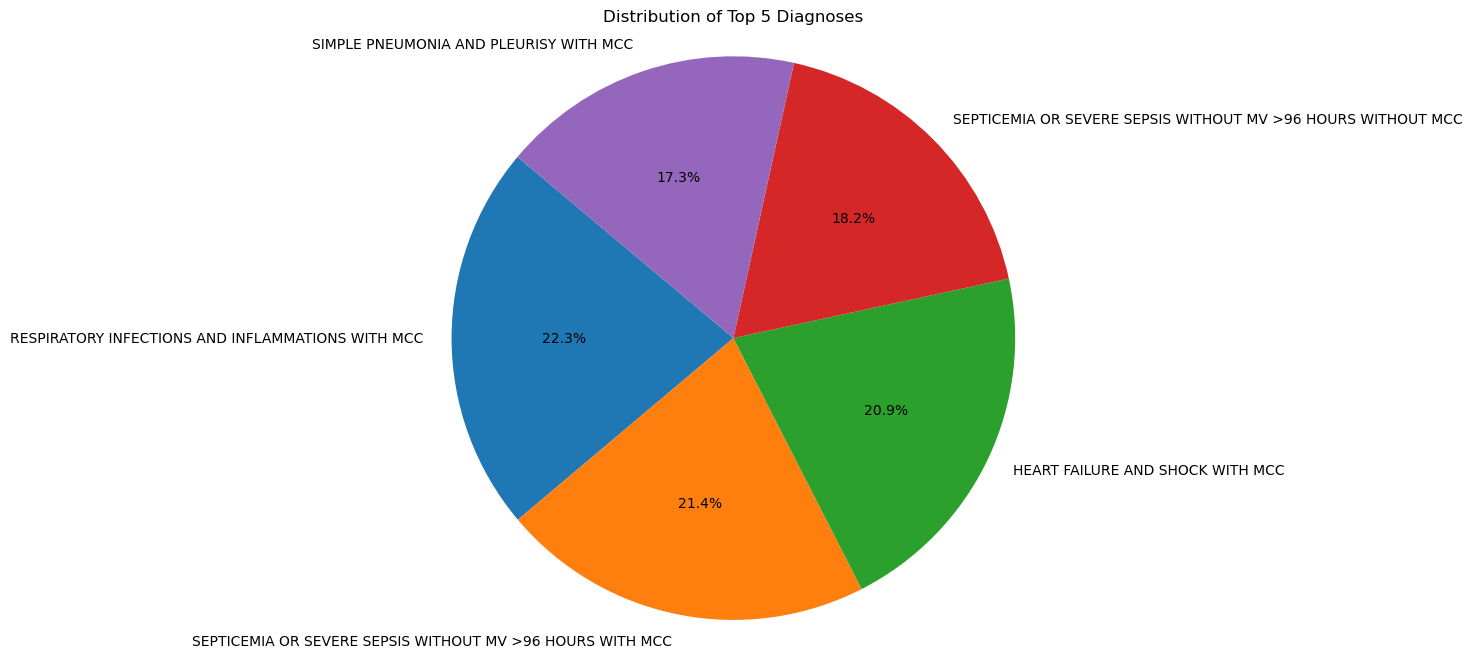

In [15]:
#Create dataset with only top 5 diagnoses by 5 selected states (selected states dataset exists below)
#create a list of top 5 diagnoses (from value counts)
#.loc = list 
top_diagnoses = medicare_data["DRG_Description"].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_diagnoses, labels=top_diagnoses.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Diagnoses')
plt.axis('equal')
plt.show()


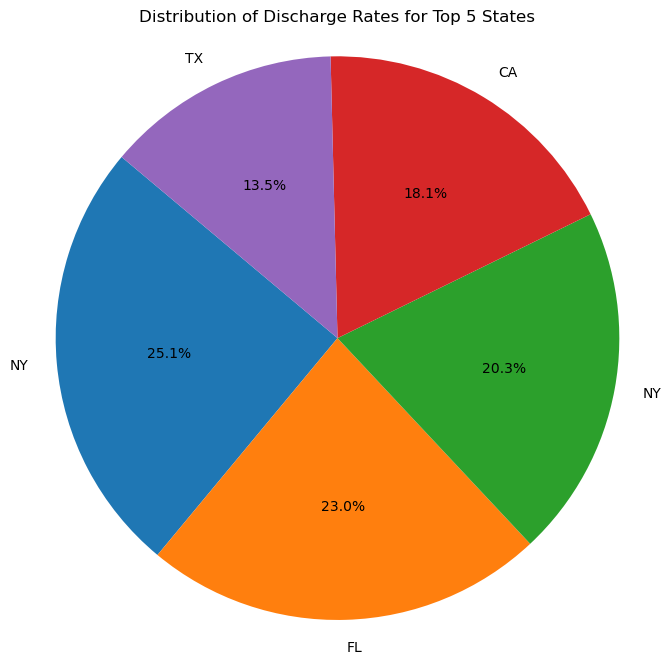

In [16]:
#Narrow down to 5 states with highest discharge rates (Ved to merge changes)   
#pie charts 
top_5_states_discharge = medicare_data.sort_values(by="Total_Discharges", ascending=False).head(5)

#pie charts 
plt.figure(figsize=(8, 8))
plt.pie(top_5_states_discharge["Total_Discharges"], labels=top_5_states_discharge["Provider_State_Abbreviation"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Discharge Rates for Top 5 States')
plt.axis('equal')
plt.show()



In [17]:
#Summary of payments by state
payments_by_state = medicare_data.groupby("Provider_State_Abbreviation")["Average_Total_Payment_Amount"].sum().sort_values(ascending=False)

summary_payments_by_state = pd.DataFrame({
    "Total Payment Amount": payments_by_state
})

summary_payments_by_state["Total Payment Amount"] = summary_payments_by_state["Total Payment Amount"].map('${:,.2f}'.format)
print(summary_payments_by_state.head())

#Summary of discharge by state
discharges_by_state = medicare_data.groupby("Provider_State_Abbreviation")["Total_Discharges"].sum().sort_values(ascending=False)

summary_discharges_by_state = pd.DataFrame({
    "Total Discharges": discharges_by_state
})
print(summary_discharges_by_state)


                            Total Payment Amount
Provider_State_Abbreviation                     
CA                               $303,254,680.44
NY                               $196,599,840.29
TX                               $187,552,180.67
FL                               $177,275,745.72
PA                               $129,206,091.00
                             Total Discharges
Provider_State_Abbreviation                  
FL                                     433383
CA                                     418924
TX                                     351098
NY                                     340165
PA                                     244726
IL                                     240110
OH                                     195803
MA                                     185708
NC                                     176433
NJ                                     176036
MI                                     169502
VA                                     159685
GA           

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the costs for each DRG

# Use groupby and summary statistical methods to calculate the following properties of each DRG: 
# mean, median, variance, standard deviation, and SEM of payment (Avg_Submtd_Cvrd_Chrg, Avg_Tot_Pymt_Amt, Avg_Mdcr_Pymt_Amt). 
# Assemble the resulting series into a single summary DataFrame.

#National avergages that can be used for comparison to state averages 

mean_submitted_charge = medicare_data.groupby("DRG_Description")["Average_Submitted_Covered_Charges"].mean().sort_values(ascending=False)
mean_tot_paymt = medicare_data.groupby("DRG_Description")["Average_Total_Payment_Amount"].mean().sort_values(ascending=False)
mean_med_paymt = medicare_data.groupby("DRG_Description")["Average_Medicare_Payment_Amount"].mean().sort_values(ascending=False)
# med_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary = pd.DataFrame({
"Mean Submitted Covered Charge": mean_submitted_charge,
"Average Total Payment Amount": mean_tot_paymt,
"Average Medicare Payment Amount": mean_med_paymt

})


cost_summary


,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount
DRG_Description,,,
ACUTE ADJUSTMENT REACTION AND PSYCHOSOCIAL DYSFUNCTION,38587.133562,9176.613532,7090.757248
ACUTE LEUKEMIA WITHOUT MAJOR O.R. PROCEDURES WITH CC,176134.324980,43756.518649,36612.054830
ACUTE LEUKEMIA WITHOUT MAJOR O.R. PROCEDURES WITH MCC,290570.065138,75755.401750,62477.587568
"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE WITH CC",44073.373635,8169.625116,6337.910304
"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE WITH MCC",64161.739085,13769.685930,11796.373274
...,...,...,...
VENTRICULAR SHUNT PROCEDURES WITHOUT CC/MCC,72615.008298,16324.271218,13772.101823
VIRAL ILLNESS WITH MCC,110632.609540,20604.250106,16093.911222
VIRAL ILLNESS WITHOUT MCC,50115.627829,11349.739920,7593.582113


## Bar Charts

In [46]:
#Create dataset for 5 states of interest (states with highest discharge rates): PA, NY, CA, TX, FL

selected_states = ["PA", "CA", "NY", "FL", "TX"]
top_states = medicare_data[medicare_data["Rndrng_Prvdr_State_Abrvtn"].isin(selected_states)]
top_states.head()



,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
7568,50002,St Rose Hospital,Hayward,27200 Calaroga Ave,6,94545,CA,1.0,Metropolitan area core: primary flow within an...,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,39,137791.79490,22175.82051,21103.051280
7569,50002,St Rose Hospital,Hayward,27200 Calaroga Ave,6,94545,CA,1.0,Metropolitan area core: primary flow within an...,189,PULMONARY EDEMA AND RESPIRATORY FAILURE,29,106855.27590,16050.62069,15234.517240
7570,50002,St Rose Hospital,Hayward,27200 Calaroga Ave,6,94545,CA,1.0,Metropolitan area core: primary flow within an...,190,CHRONIC OBSTRUCTIVE PULMONARY DISEASE WITH MCC,17,87466.29412,11918.58824,11307.529410
7571,50002,St Rose Hospital,Hayward,27200 Calaroga Ave,6,94545,CA,1.0,Metropolitan area core: primary flow within an...,194,SIMPLE PNEUMONIA AND PLEURISY WITH CC,12,74004.50000,9401.25000,8418.166667
7572,50002,St Rose Hospital,Hayward,27200 Calaroga Ave,6,94545,CA,1.0,Metropolitan area core: primary flow within an...,207,RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...,11,526444.72730,91711.45455,89971.363640


In [47]:
# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC BY TOP 5 STATES
sep = top_states.loc[top_states["DRG_Desc"]=="SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC"]

#Cost summary
mean_subm_chrg_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].mean().sort_values(ascending=False)
mean_tot_paymt_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Tot_Pymt_Amt"].mean().sort_values(ascending=False)
mean_med_paymt_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Mdcr_Pymt_Amt"].mean().sort_values(ascending=False)
perc_cov = (mean_med_paymt_sep/mean_subm_chrg_sep)*100
# med_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary_sep = pd.DataFrame({
"Mean Submitted Covered Charge": mean_subm_chrg_sep,
"Average Total Payment Amount": mean_tot_paymt_sep,
"Average Medicare Payment Amount": mean_med_paymt_sep,
"Medicare Percentage Covered": perc_cov

})
cost_summary_sep

,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount,Medicare Percentage Covered
Rndrng_Prvdr_State_Abrvtn,,,,
CA,64239.051959,11384.972145,8896.876512,13.849639
FL,57928.952145,8112.416890,6315.467976,10.902093
NY,41588.274753,11135.366537,8977.983590,21.587776
PA,43007.948847,8460.226369,6175.135158,14.358125
TX,48896.141386,9280.507469,7442.313264,15.220656


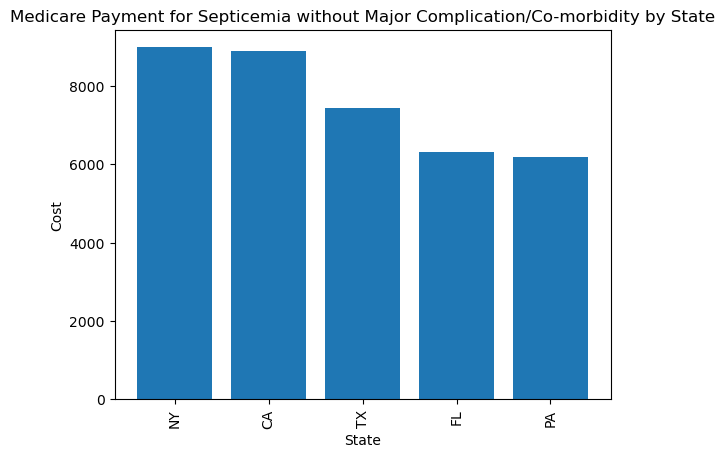

In [50]:
# Create a bar chart of medicare payments by state for septicemia without major complication using reduced selected state dataframe
height = cost_summary_sep["Average Medicare Payment Amount"].sort_values(ascending=False)

plt.bar(x=height.index, height=height)
plt.title("Medicare Payment for Septicemia without Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.savefig("Chart5.png")
plt.show()


In [51]:
#Plotly, Reset index first to convert State into column, Need to replace labels
#https://plotly.com/python/bar-charts/
fig = px.bar(x=height.reset_index()['Rndrng_Prvdr_State_Abrvtn'], y=height.reset_index()['Average Medicare Payment Amount'])
fig.show()

In [ ]:
#Top N DRG Descriptions by Frequency: Create a bar chart to display
# the top N most frequent DRG descriptions based on their frequency in the dataset.
# This can help identify the most common medical conditions.


In [ ]:
#Total Discharges by State: Create a bar chart showing the total number of discharges (hospitalizations)
# for each state.
# This can help you understand the distribution of hospitalizations across states.

In [ ]:
#Payment Summary by DRG: Create a bar chart for a specific DRG description to show the
# mean, median, or total payments for that diagnosis.
# This can help in comparing payment statistics for different diagnoses.

## Pie Charts

In [ ]:
#Distribution of Top N DRG Descriptions: Create a pie chart to visualize the
# distribution of the top N most frequent DRG descriptions as a percentage of the total.
# This can provide an overview of the most common medical conditions.


In [ ]:
#Distribution of Total Discharges by State: Create a pie chart to show the distribution
# of total discharges across states as a percentage of the total.
# This can help highlight states with a higher share of discharges.

In [ ]:
#Distribution of Total Payments by State: Create a pie chart to visualize the distribution
# of total Medicare payments across states as a percentage of the total.
# This can highlight states with higher Medicare payments.

## Quartiles, Outliers and Boxplots

In [ ]:
#Calculate Quartiles: Calculate the quartiles (Q1, Q2/Median, Q3) for payment amounts
# (e.g., "Avg_Tot_Pymt_Amt") for your entire dataset or for specific DRG
# descriptions, states, or other groupings of interest.
# You can use the quantile() method in Pandas to calculate quartiles.

In [ ]:
#Create Boxplots: Create boxplots to visualize the distribution of payment amounts.
# Boxplots show the median, quartiles, and potential outliers.
# You can use the boxplot() function from Matplotlib to create boxplots.

In [ ]:
#Identify Outliers: Determine the outliers in your data based on quartiles.
# Outliers are data points that fall significantly above or below
# the quartiles and can be identified using the IQR (Interquartile Range) method.
# Outliers are typically defined as values outside the range: Q1 - 1.5 * IQR to Q3 + 1.5 * IQR.

## Correlation and Regression

In [ ]:
#Calculate Correlation Coefficients: Compute the correlation coefficients between
# "Total_Discharges" and "Average_Total_Payment_Amount".
correlation_coefficient = medicare_data["Total_Discharges"].corr(medicare_data["Average_Total_Payment_Amount"])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
plt.scatter(medicare_data["Total_Discharges"], medicare_data["Average_Total_Payment_Amount"], alpha=0.5)
plt.title("Scatter Plot: Total Discharges vs. Average Total Payment Amount")
plt.xlabel("Total Discharges")
plt.ylabel("Average Total Payment Amount")
plt.grid(True)
plt.show()

In [ ]:
#Regression analysis
X = medicare_data["Total_Discharges"]
y = medicare_data["Average_Total_Payment_Amount"]
